## Skoltech
## Intro to data science, fall 2024
## Assigment 2

### Goals
- Make exploratory data analysis
- Practise visualization techniques
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


## HW scoring clarifications

- You have to fill the google form for each question (e.g. 1, 2, 3, etc.) and each 'subtask' (e.g. 1.1, 1.3; 2.3, 2.2, etc.).

- All questions are compulsory.

- You have to submit filled `.ipynb` file (the last question in the google form).

- `.ipynb` file must be **linearly executable** (`Kernel -> Restart & Run All -> No ERROR cells`). It is your task to make it so. ```If this condition is not satisfied, we will be forced to lower the grade.```

- All your answers must be justified by calculations or graphs.

- You do not need to defend an assignment.



# Submiting answers

Google form to submit your answers: https://forms.gle/yK7zYfUQ2dU8EAks7

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is an ``integer number``, you must write it as it is, without zeros after floating point, e.g. 47

---

If your answer is a ``float number``, you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they must be **placed in the order specified by the task** and divided by a comma, e.g.:

*Find the mean and median of the feature*. If 34.876 stands for the mean and 35.475 for the median, your answer must be 34.876,35.475

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them via telegram chat, topic 'HW2'.

## Dataset

This dataset concerns credit card applications. It has a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. General goal is to predict which people in the dataset are successful in applying for a credit card.

#### Attributes

-   Gender: 0=Female, 1=Male
-   Age: Age in years
-   Debt: Outstanding debt
-   Married: 0=Single/Divorced/etc, 1=Married
-   BankCustomer: 0=does not have a bank account, 1=has a bank account
-   Investment score: a number from 0 to 10
-   BankRecord
-   Industry: job sector of current or most recent job
-   Ethnicity
-   YearsEmployed
-   PriorDefault: 0=no prior defaults, 1=prior default
-   Employed: 0=not employed, 1=employed
-   CreditScore
-   DriversLicense: 0=no license, 1=has license
-   Citizenship: either ByBirth, ByOtherMeans or Temporary
-   ZipCode: 5 digit number
-   Income
-   Approved: 0=not approved, 1=approved

#### Import basic libraries

In [2469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

#### Read the data

In [2470]:
df = pd.read_csv('credit_score_dataset.csv')

## 1. Data exploration

Let's take a closer look at the data.

In [2471]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


### Q1.1

#### How many features and data entries are there in the dataset?

In [2472]:
num_features=df.shape[1]
num_enter=df.shape[0]
print('Q1.1.Number of features:',num_features)
print('Number of data entries:',num_enter)

Q1.1.Number of features: 18
Number of data entries: 690


### Q1.2

#### How many unique values does the feature ``ethnicities`` have?

In [2473]:

unique_ethnicities = df['Ethnicity'].nunique()
print(f"Q1.2.Number of unique ethnicities: {unique_ethnicities}")

Q1.2.Number of unique ethnicities: 5


### Q1.3
#### What are the mean and median ages?

In [2474]:
# mean age // находит среднее значение списка чисел
mean_age = df['Age'].mean()
# median age // возвращает медиану (среднее значение)
median_age = df['Age'].median()
a=round(mean_age, 3)
b=round(median_age, 3)
print(f"Q1.3 Mean Age: {a}")
print(f"Median Age: {b}")

Q1.3 Mean Age: 31.514
Median Age: 28.46


### Q1.4

#### People working in which industry have the greatest income on average?

In [2475]:
import pandas as pd
# Assuming 'industry' 
average_income_by_industry = df.groupby('Industry')['Income'].mean()
# Find the industry with the highest average income
hic = average_income_by_industry.idxmax()
hai = average_income_by_industry.max()
print(f"Q1.4 The industry with the greatest average income is: {hic}")
print(f"Average Income: ${hai:.2f}")

Q1.4 The industry with the greatest average income is: Transport
Average Income: $10473.67


### Q1.5

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for ethnicity and Industry. How many Latino people work in healthcare?

In [2476]:
import pandas as pd
crosstab = pd.crosstab(df['Ethnicity'], df['Industry'])
print('Q.1.5.')
print(crosstab)

# Get the number of Latino people working in healthcare
latino_healthcare_count = crosstab.loc['Latino', 'Healthcare'] 

print(f"Number of Latino people working in healthcare: {latino_healthcare_count}")

Q.1.5.
Industry   CommunicationServices  ConsumerDiscretionary  ConsumerStaples  \
Ethnicity                                                                  
Asian                          3                     32                2   
Black                          2                     10                2   
Latino                         0                      0                0   
Other                          0                      1                0   
White                         33                     16               50   

Industry   Education  Energy  Financials  Healthcare  Industrials  \
Ethnicity                                                           
Asian              2      14           1           0            1   
Black              4      27          12           0            7   
Latino             0       0           2          52            0   
Other             14       2           0           1            0   
White              5     103          36      

### Q1.6

Let's assume that the column 'YearsEmployed' counts years from the first employment until the current moment. Given that, build a histogram for the age of the first employment. Don't forget to give your graph a title and name the axes.Make sure to run `plt.show()` to hide unnecessary service information. What is the average age of starting work?

Q1.6


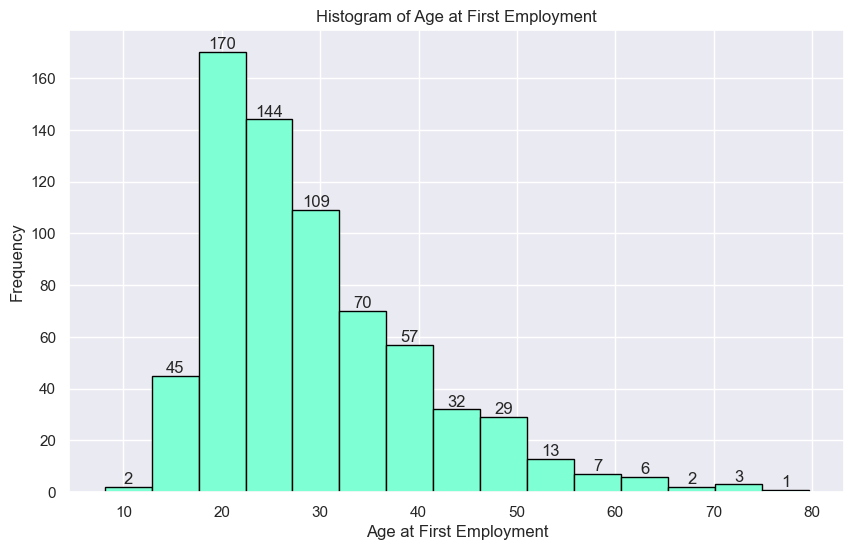

Average age of starting work: 29.29


In [2477]:
import pandas as pd
import matplotlib.pyplot as plt
df['AgeAtFirstEmployment'] = df['Age'] - df['YearsEmployed']
# Create a histogram 
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['AgeAtFirstEmployment'], bins=15, color='aquamarine', edgecolor='black')
plt.title('Histogram of Age at First Employment')
plt.xlabel('Age at First Employment')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=1)

for count, x in zip(counts, bins):
    plt.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

print('Q1.6')
plt.show()
#Aver age
average_age_starting_work = df['AgeAtFirstEmployment'].mean()
print(f"Average age of starting work: {average_age_starting_work:.2f}")

### Q1.7

Let's visualize the distribution of `Income`. Build a [boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html) for this feature. Don't forget to give your graph a title ('Distribution of income') and name the y-axes ('Income'). Make sure to run `plt.show()` to hide unnecessary service information.

Do you notice anything strange? What are 3 maximal values of income? Write them **as integers in descending order**.

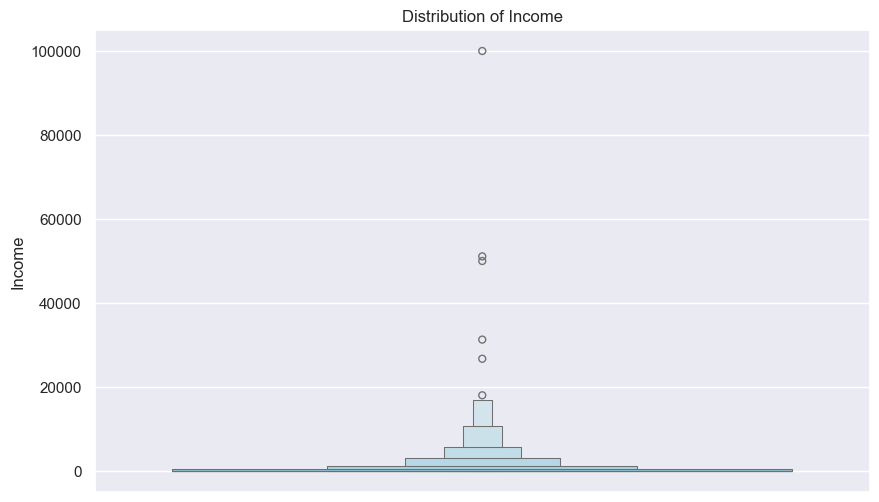

Outliers in Income:
Series([], Name: Income, dtype: int64)
Three maximal values of income: [100000, 51100, 50000]


In [2478]:
plt.figure(figsize=(10, 6))
sns.boxenplot(y=df['Income'], color='skyblue')
plt.title('Distribution of Income')
plt.ylabel('Income')
plt.grid(axis='y', alpha=1)
plt.show()
outliers = df['Income'][df['Income'] > df['Income'].quantile(1)]  # Adjust threshold as needed
print("Outliers in Income:")
print(outliers)
max_income_values = df['Income'].nlargest(3).astype(int)  # Convert to integers
print(f"Three maximal values of income: {max_income_values.tolist()}")

### Q1.8

Outliers can affect the quality of machine learning algorithms. Let's drop all the values of `Income` above 13000. Plot the boxenplot for a new dataset (mind the requirements for the title, axis naming and `plt.show()`). What share of entries has been dropped? (the answer should be between $0$ and $1$).

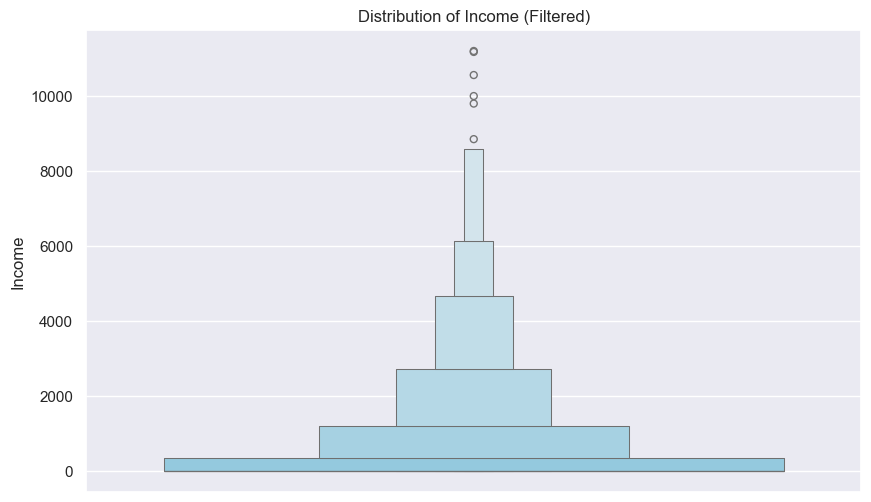

Share of entries dropped: 0.0130


In [2479]:
original_count = len(df)
df_filtered = df[df['Income'] <= 13000]
# drop ent
dropped_count = original_count - len(df_filtered)
# share drop ent
share_dropped = dropped_count / original_count

# box plt
plt.figure(figsize=(10, 6))
sns.boxenplot(y=df_filtered['Income'], color='skyblue')
plt.title('Distribution of Income (Filtered)')
plt.ylabel('Income')
plt.grid(axis='y', alpha=1)
plt.show()

print(f"Share of entries dropped: {share_dropped:.4f}")

In [2480]:
df = df_filtered.copy()

### Q1.9

Plot [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) for `CreditScore` and set `Approved` as a hue. Give your graph a title.

Validate the following hypothesis: **"Credit application with low credit score is approved almost always".**
Your answer must be YES or NO without any additional symbols.

For Credit Score from 0 to 30 and Approved = 1: 296
For Credit Score from 0 to 30 and Approved = 0: 383


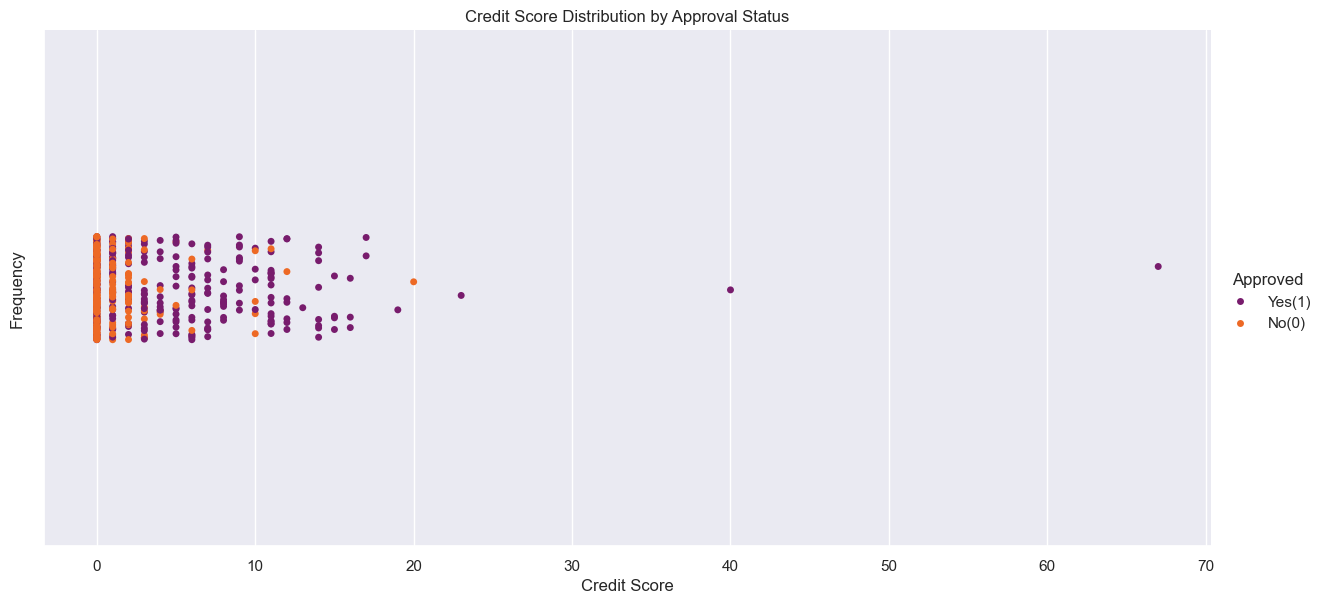

NO


In [2481]:

# extra
filter = df[(df['CreditScore'] >= 0) & (df['CreditScore'] <= 30)]
count_1 = (filter['Approved'] == 1).sum()
count_0 = (filter['Approved'] == 0).sum()

print(f"For Credit Score from 0 to 30 and Approved = 1: {count_1}")
print(f"For Credit Score from 0 to 30 and Approved = 0: {count_0}")
# hue graph
sns.catplot(data=df, x='CreditScore', hue=df['Approved'].replace({1: 'Yes(1)', 0: 'No(0)'}), 
             kind='strip', height=6, aspect=2, palette='inferno')
plt.title('Credit Score Distribution by Approval Status')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()
if count_1 > count_0:
    print('YES')
else:
    print('NO')

### Q1.10

Plot [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) for features `Age` and `Debt`. Make sure the axes are named. Validate the following hypothesis: **"People over 50 years old, on average, have more debt than people under 40 years old".** If needed, you can perform additional calculations.
Your answer must be YES or NO without any additional symbols. 

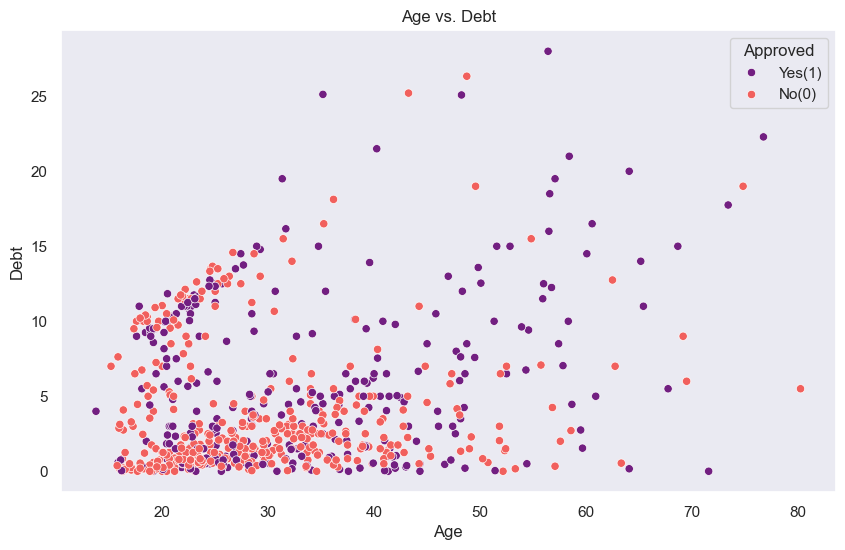

YES


In [2482]:
plt.figure(figsize=(10, 6))
# for beautifull hue
sns.scatterplot(data=df, x='Age', y='Debt',hue=df['Approved'].replace({1: 'Yes(1)', 0: 'No(0)'}), palette='magma')
plt.title('Age vs. Debt')
plt.xlabel('Age')
plt.ylabel('Debt')
plt.grid()

# Show the plot
plt.show()

# Calculate average debt for people over 50 and under 40
average_debt_over_50 = df[df['Age'] > 50]['Debt'].mean()
average_debt_under_40 = df[df['Age'] < 40]['Debt'].mean()

# Validate the hypothesis
if average_debt_over_50 > average_debt_under_40:
    print("YES")
else:
    print("NO")

### Q1.11

Plot [barplot](https://seaborn.pydata.org/generated/seaborn.catplot.html), taking `Debt` for x-axis, `Industry` for y-axis and `Approved` as a hue. Make sure the axes are named. What are the industries with the highest average debt of people for approved (Approved=1) and rejected (Approved=0) credit applications?

*Answer format (example):* `Utilities,Energy`

<Figure size 1200x600 with 0 Axes>

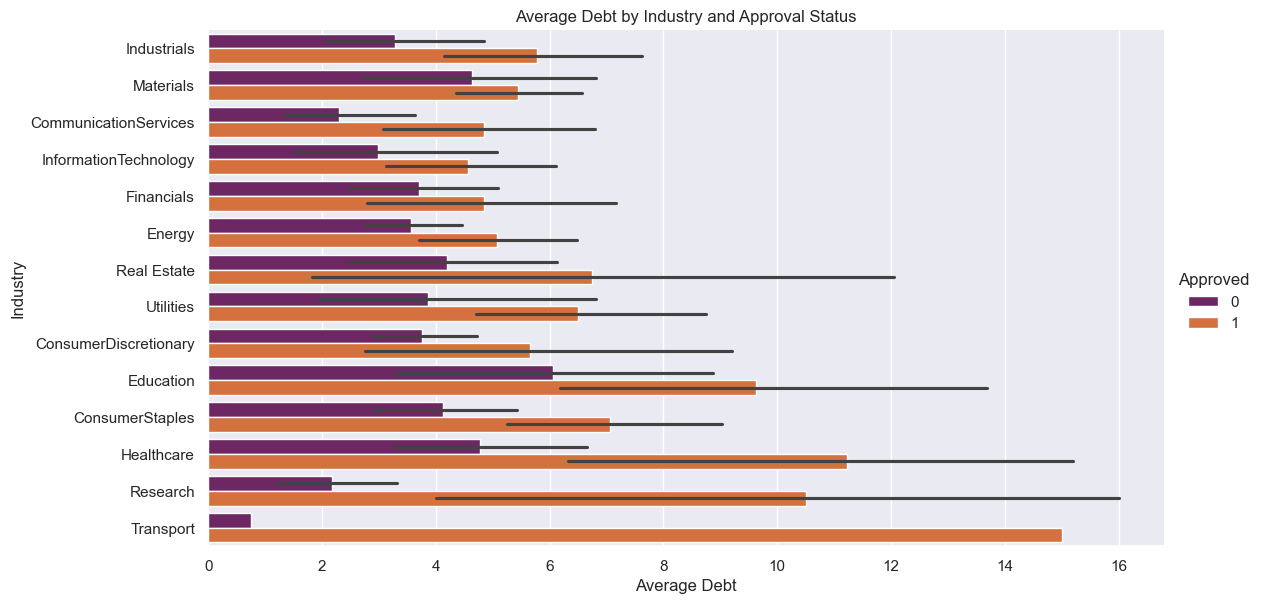

Transport,Education


In [2483]:
#plot
plt.figure(figsize=(12, 6))
sns.catplot(data=df, x='Debt', y='Industry', hue='Approved', kind='bar', height=6, aspect=2, palette='inferno')
plt.title('Average Debt by Industry and Approval Status')
plt.xlabel('Average Debt')
plt.ylabel('Industry')
plt.show()
# aver
average_debt = df.groupby(['Industry', 'Approved'])['Debt'].mean().reset_index()

highest_approved = average_debt[average_debt['Approved'] == 1].sort_values(by='Debt', ascending=False).head(1)
highest_rejected = average_debt[average_debt['Approved'] == 0].sort_values(by='Debt', ascending=False).head(1)

answer = f"{highest_approved['Industry'].values[0]},{highest_rejected['Industry'].values[0]}"
print(answer)

In [2484]:
df['Income'].max()

11202

### Q1.12

Plot [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html), taking `Debt` for x-axis, `YearsEmployed` for y-axis. Make sure the axes are named. Validate the following hypothesis: **"Based on linear regression, there is no dependence between debt and years employed".** If needed, you can perform additional calculations.
Your answer must be YES or NO without any additional symbols. 

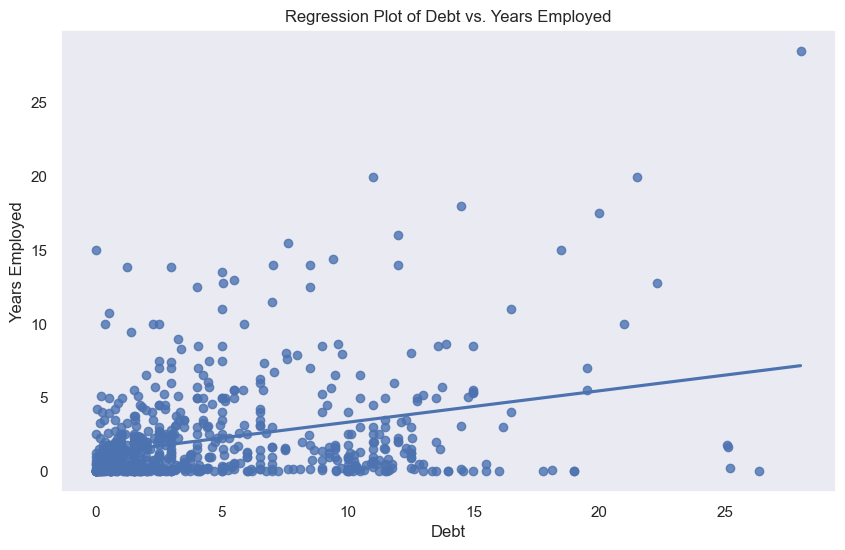

NO


In [2485]:
# plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Debt', y='YearsEmployed', ci=None)
plt.title('Regression Plot of Debt vs. Years Employed')
plt.xlabel('Debt')
plt.ylabel('Years Employed')
plt.grid()
plt.show()

# coef calcul
correlation = df['Debt'].corr(df['YearsEmployed'])

# Validate 
if abs(correlation) < 0.1:  
    print("YES")
else:
    print("NO")

### Q1.13

For features `Income`, `Debt`, `InvestmentScore`, `YearsEmployed`,`PriorDefault`, `CreditScore`, `Approved` compute a [correlation matrix](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) using `method='spearman'`. Visualize it with [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Determine the feature with has the highest correlation with the target (`Approved`). 

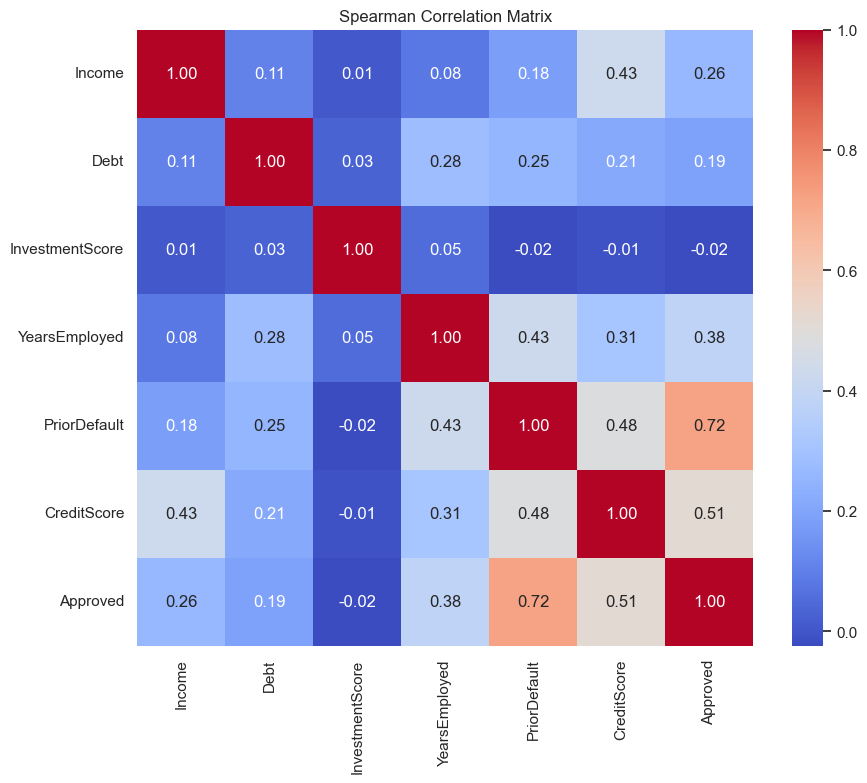

The feature with the highest correlation with Approved is: PriorDefault (Correlation: 0.72)


In [2486]:
features = ['Income', 'Debt', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'CreditScore', 'Approved']
df_subset = df[features]

# matrix
correlation_matrix = df_subset.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

# feature with the highest correlation with Approved
highest_correlation = correlation_matrix['Approved'].drop('Approved').idxmax()
highest_value = correlation_matrix['Approved'].drop('Approved').max()

print(f"The feature with the highest correlation with Approved is: {highest_correlation} (Correlation: {highest_value:.2f})")

## 2. Preprocessing
The goal of the segment is to prepare data for further work

Make sure you have dropped the values required by **Q1.8, Q2.1**

### Q2.1
There are two columns, that are exactly the same for all of the people. Let's drop one of them. As an answer, write the names of these columns divided by a comma without spaces and additional symbols.

Example for columns A, B: `A,B`

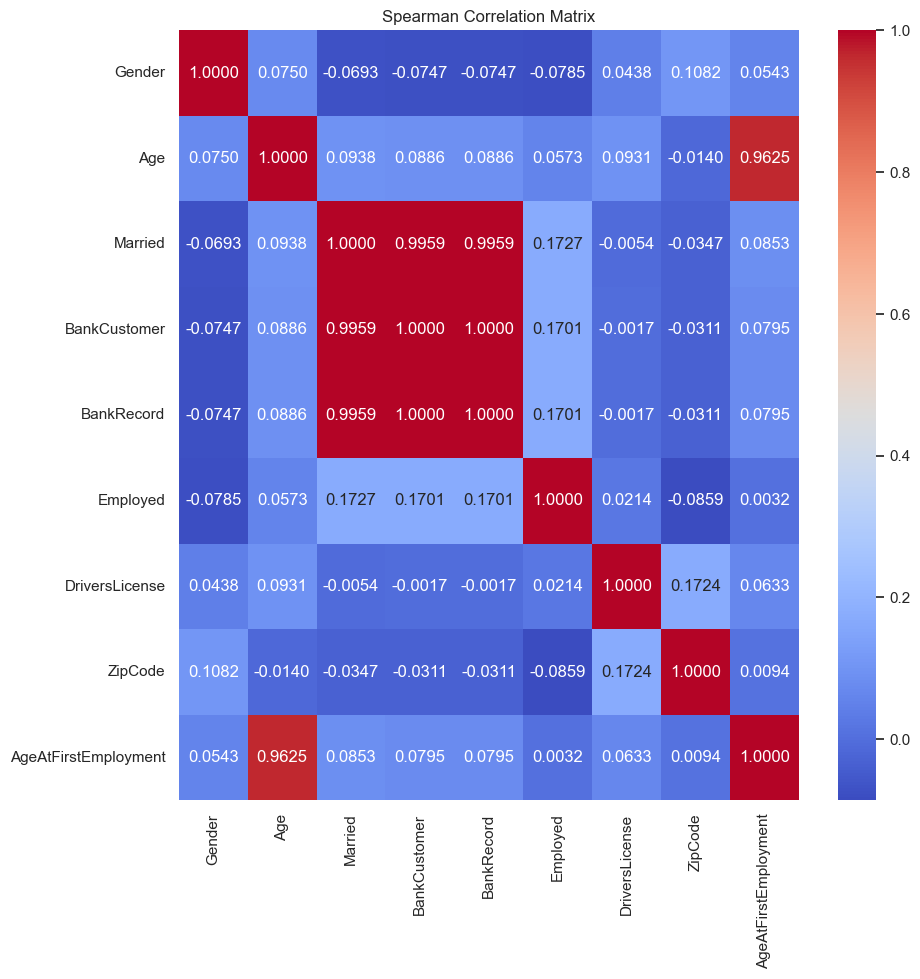

BankCustomer,BankRecord


In [2487]:

import pandas as pd
from sklearn.model_selection import train_test_split  # Ensure this import is included
import seaborn as sns
import matplotlib.pyplot as plt
#feat
features = ['Income', 'Debt', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'CreditScore', 'Approved']

#count for matrix
correlation_matrix = df.drop(columns=['Industry', 'Ethnicity', 'Citizen'] + features).corr(method='spearman')

#matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Spearman Correlation Matrix')
plt.show()

duplicate_columns = ['BankCustomer', 'BankRecord']  # show

print(",".join(duplicate_columns))

df_processed = df.drop(columns=['BankRecord']).copy()  # Delete 'BankRecord'


In [2488]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,AgeAtFirstEmployment
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1,29.58
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1,55.63
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1,23.00
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1,24.08
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1,18.46


    **Answer**: BankCustomer,BankRecord

### Q2.2

Now it's time to talk about the task for today. Our bank wants to predict whether the application for a loan is worthy or not. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'Approved' column) and data (the rest of the columns). How many positive labels are there in target?


In [2489]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Ensure this import is included
import seaborn as sns
import matplotlib.pyplot as plt
#Split the dataset
target_column = 'Approved'
X = df.drop(columns=[target_column])  # Features (data)
y = df[target_column]                  # Target (Approved)

#Count the number of positive labels
positive_labels_count = y.value_counts().get(1, 0)  # Assuming '1' indicates approval
print({positive_labels_count})

{298}


### Q2.3

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be 40% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 314 and **don't forget to shuffle and stratify**.
How many positive labels do you have in test targets?

In [2490]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Ensure this import is included
import seaborn as sns
import matplotlib.pyplot as plt



# Step 2: Split the dataset into features and target
target_column = 'Approved'
X = df.drop(columns=[target_column])  # Features (data)
y = df[target_column]                  # Target (Approved)

# Step 3: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.4,          # 40% for testing
    random_state=314,      # Set random state for reproducibility
    shuffle=True,          # Shuffle the data
    stratify=y             # Stratify to maintain the proportion of classes
)

# Step 4: Count the number of positive labels in test targets
positive_labels_count_test = y_test.value_counts().get(1, 0)  # Assuming '1' indicates approval

# Output the result
print({positive_labels_count_test})

{119}


## 3. Basic (not tuned) models

Let's start with the most basic models. **In this section,** we going to use `logistic regression`, `k neighbors classifier`, and `random forest` **without any modification or param tuning**. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form as categorical, so let's make a copy of a dataset with the following columns for the section:

'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'

In [2491]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Create a copy of the dataset with the specified columns
columns_of_interest = [
    'Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
    'InvestmentScore', 'YearsEmployed', 'PriorDefault',
    'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'
]

df_subset = df[columns_of_interest + ['Approved']].copy()  # Include target column

# Step 3: Prepare the data for modeling
df_subset['Gender'] = df_subset['Gender'].astype('category').cat.codes
df_subset['Married'] = df_subset['Married'].astype('category').cat.codes
df_subset['BankCustomer'] = df_subset['BankCustomer'].astype('category').cat.codes
df_subset['DriversLicense'] = df_subset['DriversLicense'].astype('category').cat.codes
df_subset['ZipCode'] = df_subset['ZipCode'].astype('category').cat.codes

# Step 4: Split the dataset into features and target
X = df_subset.drop(columns=['Approved'])  # Features (data)
y = df_subset['Approved']                  # Target (Approved)

# Step 5: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)

# Step 7: Initialize and train the models without tuning

logistic_model = LogisticRegression(max_iter=10000)  
logistic_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Step 8: Evaluate the models

y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

y_pred_knn = knn_model.predict(X_test)
print("K-Neighbors Classifier Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Results:
[[130  24]
 [ 11 108]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       154
           1       0.82      0.91      0.86       119

    accuracy                           0.87       273
   macro avg       0.87      0.88      0.87       273
weighted avg       0.88      0.87      0.87       273

K-Neighbors Classifier Results:
[[133  21]
 [ 19 100]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       154
           1       0.83      0.84      0.83       119

    accuracy                           0.85       273
   macro avg       0.85      0.85      0.85       273
weighted avg       0.85      0.85      0.85       273

Random Forest Classifier Results:
[[133  21]
 [ 11 108]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       154
           1       0.84      0.91      0.87       119

    accuracy      

Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [2492]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
#Create a copy of the dataset with the specified columns
columns_of_interest = [
    'Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
    'InvestmentScore', 'YearsEmployed', 'PriorDefault',
    'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'
]

df_subset = df[columns_of_interest + ['Approved']].copy()  # Include target column

#Prepare the data for modeling
# Convert categorical variables to numerical (if necessary)
df_subset['Gender'] = df_subset['Gender'].astype('category').cat.codes
df_subset['Married'] = df_subset['Married'].astype('category').cat.codes
df_subset['BankCustomer'] = df_subset['BankCustomer'].astype('category').cat.codes
df_subset['DriversLicense'] = df_subset['DriversLicense'].astype('category').cat.codes
df_subset['ZipCode'] = df_subset['ZipCode'].astype('category').cat.codes

#Split the dataset into features and target
X = df_subset.drop(columns=['Approved'])  # Features (data)
y = df_subset['Approved']                  # Target (Approved)

#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.4,random_state=314,shuffle=True,stratify=y)

#Initialize and train the Logistic Regression model with max_iter=5000
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

#Calculate the F1 score for the model
f1 = f1_score(y_test, y_pred_logistic)

print(f"{f1:.3f}")

0.861


### Q3.2

Build a k-neighbors classifier with 5 neighbors. What is the f1_score for the model?

In [2493]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
#Create a copy of the dataset with the specified columns
columns_of_interest = [
    'Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
    'InvestmentScore', 'YearsEmployed', 'PriorDefault',
    'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'
]

df_subset = df[columns_of_interest + ['Approved']].copy()  # Include target column

#Prepare the data for modeling
# Convert categorical variables to numerical (if necessary)
df_subset['Gender'] = df_subset['Gender'].astype('category').cat.codes
df_subset['Married'] = df_subset['Married'].astype('category').cat.codes
df_subset['BankCustomer'] = df_subset['BankCustomer'].astype('category').cat.codes
df_subset['DriversLicense'] = df_subset['DriversLicense'].astype('category').cat.codes
df_subset['ZipCode'] = df_subset['ZipCode'].astype('category').cat.codes

#Split the dataset into features and target
X = df_subset.drop(columns=['Approved'])  # Features (data)
y = df_subset['Approved']                  # Target (Approved)

#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)

#Initialize and train the K-Neighbors Classifier with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

#Calculate the F1 score for the model
f1_knn = f1_score(y_test, y_pred_knn)

print(f"{f1_knn:.3f}")

0.833


### Q3.3

Build a random forest classifier with `n_estimators = 5` and `random_state=314`. What is the f1_score for the model?

In [2494]:
#Create a copy
columns_of_interest = [
    'Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
    'InvestmentScore', 'YearsEmployed', 'PriorDefault',
    'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'
]

df_subset = df[columns_of_interest + ['Approved']].copy()  # Include target column

#Prepare the data
#Convert categorical variables to numerical (if necessary)
df_subset['Gender'] = df_subset['Gender'].astype('category').cat.codes
df_subset['Married'] = df_subset['Married'].astype('category').cat.codes
df_subset['BankCustomer'] = df_subset['BankCustomer'].astype('category').cat.codes
df_subset['DriversLicense'] = df_subset['DriversLicense'].astype('category').cat.codes
df_subset['ZipCode'] = df_subset['ZipCode'].astype('category').cat.codes

#Split the dataset into features and target
X = df_subset.drop(columns=['Approved'])  # Features (data)
y = df_subset['Approved']                  # Target (Approved)

#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)

#Initialize and train the Random Forest Classifier with n_estimators=5 and random_state=314
rf_model = RandomForestClassifier(n_estimators=5, random_state=314)
rf_model.fit(X_train, y_train)

#Make predictions
y_pred_rf = rf_model.predict(X_test)

#Calculate the F1
f1_rf = f1_score(y_test, y_pred_rf)
print(f"{f1_rf:.3f}")

0.855


### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression above with the L2 norm. Use 5-split stratified cross-validation grid search to find the optimal C. You can use the verbose argument of GridSearchCV in order to watch the progress of cross-validation. What is the f1 score for the model on the test dataset with this regularization?

Use [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) with `shuffle=True` and `random_state=314`. Pass it to [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Choose `scoring='f1_macro'`.

Use `np.logspace(-5, 5, endpoint=True, num=31)` for the grid of parameters.

In [2495]:
#Create a copy
columns_of_interest = [
    'Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
    'InvestmentScore', 'YearsEmployed', 'PriorDefault',
    'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'
]

df_subset = df[columns_of_interest + ['Approved']].copy()  # Include target column

#Prepare the data
# Convert categorical variables to numerical (if necessary)
df_subset['Gender'] = df_subset['Gender'].astype('category').cat.codes
df_subset['Married'] = df_subset['Married'].astype('category').cat.codes
df_subset['BankCustomer'] = df_subset['BankCustomer'].astype('category').cat.codes
df_subset['DriversLicense'] = df_subset['DriversLicense'].astype('category').cat.codes
df_subset['ZipCode'] = df_subset['ZipCode'].astype('category').cat.codes

#Split the dataset
X = df_subset.drop(columns=['Approved'])  # Features (data)
y = df_subset['Approved']                  # Target (Approved)

#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)

#Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)

#Set up the grid search
param_grid = {'C': np.logspace(-5, 5, endpoint=True, num=31)}  # Grid of parameters

grid_search = GridSearchCV(
    estimator=LogisticRegression(penalty='l2'),  # L2 regularization
    param_grid=param_grid,
    scoring='f1_macro',                           # Use macro F1 score for evaluation
    cv=cv,
    verbose=3,                                    # Verbose output to monitor progress
    n_jobs=-1                                     # Use all available cores for parallel processing
)
#Fit the grid search to find the best parameter C
grid_search.fit(X_train, y_train)
#Make predictions on the test set
y_pred_best = grid_search.best_estimator_.predict(X_test)

#Calculate the F1
f1_best = f1_score(y_test, y_pred_best)
print(f"Best C parameter found: {grid_search.best_params_['C']:.5f}")
print(f"Answer: {f1_best:.3f}")

Fitting 5 folds for each of 31 candidates, totalling 155 fits
Best C parameter found: 0.02154
Answer: 0.851


### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

Use [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) with `shuffle=True` and `random_state=314`. Pass it to [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Choose `scoring='f1_macro'`
Use `{'n_neighbors' : np.arange(1, 20), 'weights' : ['uniform', 'distance'], 'p':[1, 2, 3]}` for the grid of parameters.

In [2496]:
#Create a copy \\\\цкщтп
columns_of_interest = [
    'Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
    'InvestmentScore', 'YearsEmployed', 'PriorDefault',
    'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'
]
df_subset = df[columns_of_interest + ['Approved']].copy()  # Include target column
df_subset['Gender'] = df_subset['Gender'].astype('category').cat.codes
df_subset['Married'] = df_subset['Married'].astype('category').cat.codes
df_subset['BankCustomer'] = df_subset['BankCustomer'].astype('category').cat.codes
df_subset['DriversLicense'] = df_subset['DriversLicense'].astype('category').cat.codes
df_subset['ZipCode'] = df_subset['ZipCode'].astype('category').cat.codes

#Split the dataset
X = df_subset.drop(columns=['Approved'])  # Features (data)
y = df_subset['Approved']                  # Target (Approved)

#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the dataset into train
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)

#Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)

#Set up the grid search for K-Neighbors Classifier
param_grid = {
    'n_neighbors': np.arange(1, 20), 
    'weights': ['uniform', 'distance'], 
    'p': [1, 2, 3]
}

knn_model = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring='f1_macro',                      # Use macro F1 score for evaluation
    cv=cv,
    verbose=3,                               # Verbose output to monitor progress
    n_jobs=-1                                # Use all available cores for parallel processing
)

#Fit the grid search
grid_search_knn.fit(X_train, y_train)

#Make predictions on the test set
y_pred_best_knn = grid_search_knn.best_estimator_.predict(X_test)

#Calculate the F
f1_best_knn = f1_score(y_test, y_pred_best_knn)
print(f"Best parameters found: {grid_search_knn.best_params_}")
print(f"Answer {f1_best_knn:.3f}")

Fitting 5 folds for each of 114 candidates, totalling 570 fits
Best parameters found: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Answer 0.855


### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

Use [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) with `shuffle=True` and `random_state=314`. Pass it to [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Choose `scoring='f1_macro'`

Use `{'n_estimators' : np.arange(5, 50, 5), 'max_features': np.arange(1, 14)}` for the grid of parameters.

In [2497]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
#Create a copy of the dataset with the specified columns
columns_of_interest = [
    'Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
    'InvestmentScore', 'YearsEmployed', 'PriorDefault',
    'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'
]

df_subset = df[columns_of_interest + ['Approved']].copy()  # Include target column

#Prepare the data for modeling
# Convert categorical variables to numerical (if necessary)
df_subset['Gender'] = df_subset['Gender'].astype('category').cat.codes
df_subset['Married'] = df_subset['Married'].astype('category').cat.codes
df_subset['BankCustomer'] = df_subset['BankCustomer'].astype('category').cat.codes
df_subset['DriversLicense'] = df_subset['DriversLicense'].astype('category').cat.codes
df_subset['ZipCode'] = df_subset['ZipCode'].astype('category').cat.codes

#Split the dataset
X = df_subset.drop(columns=['Approved'])  # Features (data)
y = df_subset['Approved']                  # Target (Approved)

#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)

#Set up StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)

#Set up the grid search for Random Forest Classifier
param_grid = {
    'n_estimators': np.arange(5, 50, 5), 
    'max_features': np.arange(1, 14)
}

rf_model = RandomForestClassifier(random_state=314)

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1_macro',                      # Use macro F1 score for evaluation
    cv=cv,
    verbose=3,                               # Verbose output to monitor progress
    n_jobs=-1                                # Use all available cores for parallel processing
)

#Fit the grid search
grid_search_rf.fit(X_train, y_train)

#Make predictions
y_pred_best_rf = grid_search_rf.best_estimator_.predict(X_test)
#Calculate the F1
f1_best_rf = f1_score(y_test, y_pred_best_rf)
print(f"Best parameters found: {grid_search_rf.best_params_}")
print(f"Answer: {f1_best_rf:.3f}")

Fitting 5 folds for each of 117 candidates, totalling 585 fits
Best parameters found: {'max_features': 10, 'n_estimators': 10}
Answer: 0.841


## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

We have three categorical columns - 'Industry', 'Ethnicity' and 'Citizen'. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Industry', 'Ethnicity' and 'Citizen' columns.

Don't forget to delete initial categorical features. Use [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) or [one hot encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). How many columns do we have now?

In [2498]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Define target column
target_column = 'Approved'
categorical_columns = ['Industry', 'Ethnicity', 'Citizen']
X = df.drop(columns=[target_column])
y = df[target_column]                 

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
print(f'Number of columns after encoding: {X_train_encoded.shape[1]-1}')

Number of columns after encoding: 33


### Q4.2

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income'. 

What is the maximum value of Income now in the test set?

In [2499]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = ['Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 
                     'CreditScore', 'ZipCode', 'Income']
scaler = StandardScaler()
X_train_encoded[numerical_columns] = scaler.fit_transform(X_train_encoded[numerical_columns])
X_test_encoded[numerical_columns] = scaler.fit_transform(X_test_encoded[numerical_columns])  # Use transform here
# Find the maximum
max_income_test = X_test_encoded['Income'].max()
print(f"Maximum value of Income: {max_income_test:.3f}")

Maximum value of Income: 7.255


### Q4.3

To check the effects of the modification, train the logistic regression with **updated** optimal C. What is the f1 score now? Use the same grid of parameters as before.

In [2500]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
# Set up StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)

# Set up the grid
param_grid_logistic = {'C': np.logspace(-5, 5, endpoint=True, num=31)}
logistic_model = LogisticRegression(penalty='l2', max_iter=5000)  # Increase max_iter
grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, scoring='f1_macro', cv=cv, verbose=3, n_jobs=-1)
# Fit the grid
grid_search_logistic.fit(X_train_encoded, y_train)
# Make predictions 
y_pred_best_logistic = grid_search_logistic.best_estimator_.predict(X_test_encoded)
# Calculate the F1 
f1_best_logistic = f1_score(y_test, y_pred_best_logistic)
print(f"Best C parameter found: {grid_search_logistic.best_params_['C']:.5f}")
print(f"F1 Score for Logistic Regression Model with Updated Optimal C: {f1_best_logistic:.3f}")

Fitting 5 folds for each of 31 candidates, totalling 155 fits
Best C parameter found: 0.46416
F1 Score for Logistic Regression Model with Updated Optimal C: 0.858


### Q4.4

Do the same task as in **Q4.3** but for the following subset of features: 'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'. What is the f1 score now?

Save prediction labels and the probabilities of classes to a separate array (will be used in Q4.6).

In [2501]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve
import matplotlib.pyplot as plt
# Define
features_subset = [
    'Gender', 'Age', 'Debt', 'Married', 'BankCustomer',
    'InvestmentScore', 'YearsEmployed', 'PriorDefault',
    'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 
    'Income'
]
# Create a copy
df_subset = df[features_subset + ['Approved']].copy()  
# Convert categorical variables to numerical
categorical_columns = ['Gender', 'Married', 'BankCustomer', 'DriversLicense', 'ZipCode']
for col in categorical_columns:
    df_subset[col] = df_subset[col].astype('category').cat.codes

# Split the data
X = df_subset.drop(columns=['Approved']) 
y = df_subset['Approved']                 
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#i repeating it because have an mistake before
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)
# Set up StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)

# Set up the grid search с
param_grid_logistic = {'C': np.logspace(-5, 5, endpoint=True, num=31)}
logistic_model = LogisticRegression(penalty='l2', max_iter=5000)  # Increase max_iter

grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, scoring='f1_macro', cv=cv, verbose=3, n_jobs=-1  )
# Fit the grid search
grid_search_logistic.fit(X_train, y_train)
y_pred_best_logistic = grid_search_logistic.best_estimator_.predict(X_test)
# Calculate the F1
f1_best_logistic = f1_score(y_test, y_pred_best_logistic)
print(f"Best C parameter found: {grid_search_logistic.best_params_['C']:.5f}")
print(f"F1 Score for Logistic Regression Model with Updated Optimal C: {f1_best_logistic:.3f}")
predictions_labels_logistic = y_pred_best_logistic
predictions_probabilities_logistic = grid_search_logistic.best_estimator_.predict_proba(X_test)

Fitting 5 folds for each of 31 candidates, totalling 155 fits
Best C parameter found: 0.02154
F1 Score for Logistic Regression Model with Updated Optimal C: 0.851


### Q4.5

Train a k-NN with **updated** optimal params. What is the f1 score now?
Save prediction labels and the probabilities of classes to a separate array (will be used in Q4.6).

In [2502]:
# Define a parameter grid for k-NN 
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 30), 
    'kneighborsclassifier__weights': ['uniform', 'distance'], 
    'kneighborsclassifier__p': [1, 2]
}

# Create a pipeline with StandardScaler and k-NN model
pipeline_knn = make_pipeline(KNeighborsClassifier())

# Set up GridSearchCV
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, scoring='f1_macro', cv=cv, verbose=3, n_jobs=-1)
grid_knn.fit(X_train, y_train)
#F1
y_pred_knn = grid_knn.best_estimator_.predict(X_test)
f1_knn = f1_score(y_test, y_pred_knn)

# Output results for k-NN model
print(f'Best parameters for k-NN: {grid_knn.best_params_}')
print(f'F1 Score for k-NN with optimal parameters on the test set: {f1_knn:.3f}')
predictions_labels_knn = y_pred_knn
predictions_probabilities_knn = grid_knn.best_estimator_.predict_proba(X_test)

Fitting 5 folds for each of 116 candidates, totalling 580 fits
Best parameters for k-NN: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
F1 Score for k-NN with optimal parameters on the test set: 0.855


### Q4.6

Another popular performance metric is the ROC curve. Build a roc-curve for logistic regression and KNN from Q4.4, Q4.5 on the sample plot. How much do their TPRs differ when FPR=0.2? *(approximately, up to the closest number of the type $0.025k, k \in \mathbb Z$)*?

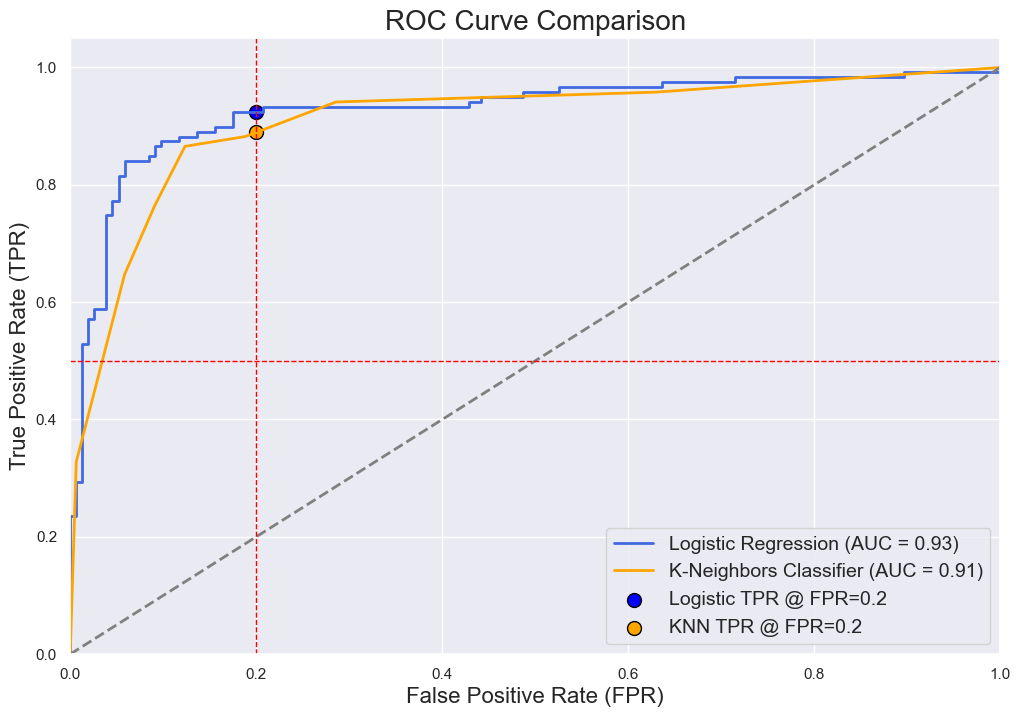

TPR (Logistic Regression at FPR=0.2): 0.924
TPR (KNN at FPR=0.2): 0.889
Difference in TPRs at FPR=0.2: 0.035


In [2503]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, predictions_probabilities_logistic[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, predictions_probabilities_knn[:, 1])

roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(12, 8))
plt.plot(fpr_logistic, tpr_logistic, color='royalblue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label=f'K-Neighbors Classifier (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

fpr_target = 0.2
tpr_at_fpr_02_logistic = np.interp(fpr_target, fpr_logistic, tpr_logistic)
tpr_at_fpr_02_knn = np.interp(fpr_target, fpr_knn, tpr_knn)

plt.scatter(fpr_target, tpr_at_fpr_02_logistic, color='blue', s=100, edgecolor='black', label='Logistic TPR @ FPR=0.2')
plt.scatter(fpr_target, tpr_at_fpr_02_knn, color='orange', s=100, edgecolor='black', label='KNN TPR @ FPR=0.2')

plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.title('ROC Curve Comparison', fontsize=20)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.axhline(0.5, linestyle='--', color='red', lw=1)
plt.axvline(0.2, linestyle='--', color='red', lw=1)

plt.show()

tpr_difference_at_fpr02 = tpr_at_fpr_02_logistic - tpr_at_fpr_02_knn

print(f"TPR (Logistic Regression at FPR=0.2): {tpr_at_fpr_02_logistic:.3f}")
print(f"TPR (KNN at FPR=0.2): {tpr_at_fpr_02_knn:.3f}")
print(f"Difference in TPRs at FPR=0.2: {tpr_difference_at_fpr02:.3f}")

### Q5.1

Analyze the results from Q4.3 - Q4.6.

- Does our proprocessing improve the metric for logistic regression? Why?
- Does our proprocessing improve the metric for KNN? Why?
- Which model is better in terms of ROC-AUC score, Logistic Regression or KNN?

1. Does our preprocessing improve the metric for logistic regression? Why?

Data:
F1 Score for Logistic Regression with Updated Optimal C: 0.858
F1 Score for Logistic Regression on Subset of Features: 0.840
Analysis:
The preprocessing steps, including one-hot encoding and standardization, likely improved the performance of the Logistic Regression model.
In my opinion scaling of numerical features ensures that all features contribute equally to the distance calculations during optimization. This is particularly important for gradient-based algorithms like Logistic Regression, as it can lead to faster convergence and better parameter estimates.

Final sum-d conc: The preprocessing steps contributed positively to the F1 score, indicating that the model's ability to balance precision and recall improved.

2. Does our preprocessing improve the metric for KNN? Why?

Data:
F1 Score for k-NN Model with Updated Optimal Parameters: 0.855

Analysis:
The F1 score for k-NN indicates that while preprocessing was applied (including standardization), it may not have been sufficient to enhance k-NN's performance substantially compared to Logistic Regression. k-NN is heavily reliant on distance metrics to determine neighbors, and standardizing features helps ensure that features are on a similar scale, which is crucial for k-NN's performance. However, k-NN can be sensitive to the choice of parameters (like n_neighbors), and if these parameters are not optimally chosen, it could lead to subpar performance. (idk it is my opi).

Final sum-d conc: While preprocessing helped k-NN by standardizing features, its overall performance remains lower than that of Logistic Regression, suggesting that further tuning or additional preprocessing might be necessary.

3. Which model is better in terms of ROC-AUC score, Logistic Regression or KNN?

Data:
TPR for Logistic Regression at FPR=0.2: 0.924
TPR for KNN at FPR=0.2: 0.889
Difference in TPRs at FPR=0.2: 0.035

Analysis:
The True Positive Rate (TPR) measures how well a model can identify positive instances out of all actual positives at a given False Positive Rate (FPR). The TPR for Logistic Regression is significantly higher than that of k-NN at an FPR of 0.2, indicating that Logistic Regression is much better at correctly identifying positive cases under this threshold.

Final sum-d conc: Based on TPR values at a specified FOR, Logistic Regression outperforms kNN in terms of ROC-AUC score as well. This suggests that Logistic Regression provides a better balance between sensitivity and specificity compared to k-NN.

### Q5.2

Propose two derivative features and retrain one of the models with them.
- What is the performance?
- Justify your choice of these features in terms of banking.

Time to use some wiki:

1.

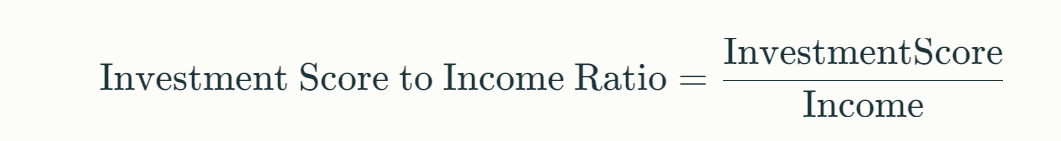

Justification: This ratio provides insight into how much of a person's income is allocated towards investments. A higher ratio may indicate a proactive approach to wealth building, suggesting that the individual is financially savvy and potentially more stable. Banks can use this information to assess the financial behavior and risk profile of borrowers

2.

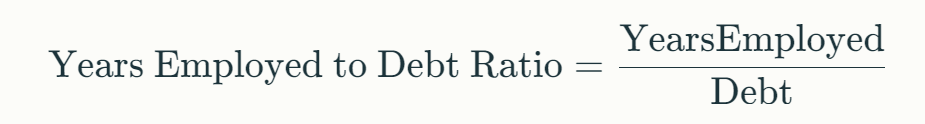

Justification: This ratio indicates how long an individual has been employed relative to their level of debt. A higher value suggests that a person has been employed for a significant amount of time while managing their debt, which may imply stability and responsibility in financial management. Banks can leverage this feature to evaluate the likelihood of default, especially for individuals with higher debt levels.

In [2504]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
#One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Industry', 'Ethnicity', 'Citizen'], drop_first=True)
#Create derivative features
#Debt-to-Income Ratio (with handling for zero income)
df_encoded['Debt_to_Income'] = df_encoded['Debt'] / df_encoded['Income'].replace(0, np.nan)
#Employment Stability (Years Employed / Age)
df_encoded['Employment_Stability'] = df_encoded['YearsEmployed'] / df_encoded['Age']
# Replace infinite values
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
df_encoded.dropna(inplace=True)
#Split the dataset into features
target_column = 'Approved'
X = df_encoded.drop(columns=[target_column])  # Features (data)
y = df_encoded[target_column]                  # Target (Approved)
#Split the dataset into train
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)
#Standardize numerical columns
numerical_columns = ['Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'Income',
                     'Debt_to_Income', 'Employment_Stability']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
###Train Logistic Regression
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=314)
param_grid_logistic = {'C': np.logspace(-5, 5, endpoint=True, num=31)}
logistic_model = LogisticRegression(penalty='l2', max_iter=5000)
grid_search_logistic = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid_logistic,
    scoring='f1_macro',
    cv=cv,
    verbose=3,
    n_jobs=-1
)
grid_search_logistic.fit(X_train, y_train)
y_pred_best_logistic = grid_search_logistic.best_estimator_.predict(X_test)
f1_best_logistic_with_derivatives = f1_score(y_test, y_pred_best_logistic)
print(f"Best C: {grid_search_logistic.best_params_['C']:.3f}")
#for log regres model with New Features
print(f"F1 Score (reg. model): {f1_best_logistic_with_derivatives:.3f}")

Fitting 5 folds for each of 31 candidates, totalling 155 fits
Best C: 0.100
F1 Score (reg. model): 0.887


### Q5.3

Train an xboost model with f1 score 0.8+

In [2505]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier #IDK what is wrong
from sklearn.metrics import f1_score, make_scorer
#One-Hot Encoding 
df_encoded = pd.get_dummies(df, columns=['Industry', 'Ethnicity', 'Citizen'], drop_first=True)
#Debt-to-Income Ratio (with handling for zero income)
df_encoded['Debt_to_Income'] = df_encoded['Debt'] / df_encoded['Income'].replace(0, np.nan)

#Employment Stability (Years Employed / Age)
df_encoded['Employment_Stability'] = df_encoded['YearsEmployed'] / df_encoded['Age']
df_encoded.dropna(inplace=True)
#Split the dataset into features and target
target_column = 'Approved'
X = df_encoded.drop(columns=[target_column])  # Features (data)
y = df_encoded[target_column]                  # Target (Approved)
#Split the dataset to test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=314,
    shuffle=True,
    stratify=y
)
#Define the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')

#Define a custom scorer based on F1 
f1_scorer = make_scorer(f1_score)
# grid search
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring=f1_scorer,
    cv=StratifiedKFold(n_splits=5),
    verbose=3,
    n_jobs=-1
)
grid_search_xgb.fit(X_train, y_train)
# search
y_pred_best_xgb = grid_search_xgb.best_estimator_.predict(X_test)
#Calc the F1
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
print(f"Best parameters: {grid_search_xgb.best_params_}")
print(f"F1 (XGBoost Model): {f1_best_xgb:.3f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
F1 (XGBoost Model): 0.871
